In [1]:
from fastai.vision import *

In [2]:
folder = 'londn'
file = 'downloadL.csv'


In [3]:
path = Path('stlt')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [4]:
path.ls()

[PosixPath('stlt/downloadL.csv'),
 PosixPath('stlt/londn'),
 PosixPath('stlt/downloadNY.csv')]

In [5]:
download_images(path/file, dest, max_pics=200)


In [6]:
folder = 'NY'
file = 'downloadNY.csv'

In [7]:
path = Path('stlt')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [8]:
path.ls()

[PosixPath('stlt/NY'),
 PosixPath('stlt/downloadL.csv'),
 PosixPath('stlt/londn'),
 PosixPath('stlt/downloadNY.csv')]

In [10]:
download_images(path/file, dest, max_pics=200)


Error https://www.washingtonpost.com/resizer/bASUQqxiyI1gvAxES0ThQSOxlLQ=/1156x0/arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/6FAYTW44OFEP7C6HM3CLBML6SI.PNG HTTPSConnectionPool(host='www.washingtonpost.com', port=443): Read timed out. (read timeout=4)


In [11]:
classes = ['londn','NY']

In [12]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

londn


Image stlt/londn/00000152.gif has 1 instead of 3 channels
Image stlt/londn/00000155.png has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='stlt/londn/00000001.jpg'>
cannot identify image file <_io.BufferedReader name='stlt/londn/00000183.jpg'>
cannot identify image file <_io.BufferedReader name='stlt/londn/00000191.jpg'>
cannot identify image file <_io.BufferedReader name='stlt/londn/00000111.jpg'>
cannot identify image file <_io.BufferedReader name='stlt/londn/00000171.jpg'>
cannot identify image file <_io.BufferedReader name='stlt/londn/00000165.jpg'>
cannot identify image file <_io.BufferedReader name='stlt/londn/00000066.jpg'>
Image stlt/londn/00000166.gif has 1 instead of 3 channels
NY


Image stlt/NY/00000182.gif has 1 instead of 3 channels


In [14]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [15]:
data.classes

['NY', 'londn']

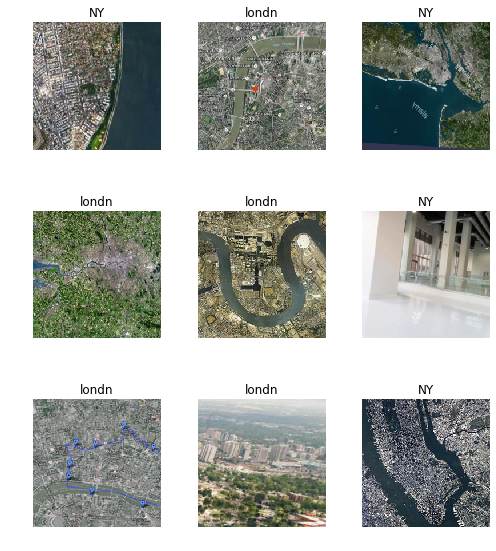

In [16]:
data.show_batch(rows=3, figsize=(7,8))

In [17]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['NY', 'londn'], 2, 310, 77)

In [18]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

In [21]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.119215,0.641404,0.233766
2,0.114824,0.604805,0.207792
3,0.105946,0.616686,0.220779
4,0.103982,0.610191,0.220779


In [22]:
learn.save('stage-1')

In [23]:
learn.unfreeze()

In [24]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


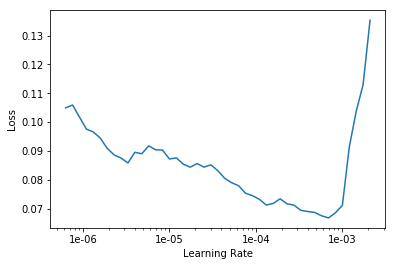

In [25]:
learn.recorder.plot()

In [26]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate
1,0.083957,0.926497,0.220779
2,0.083494,0.993266,0.220779


In [27]:
learn.save('stage-2')

In [28]:
interp = ClassificationInterpretation.from_learner(learn)

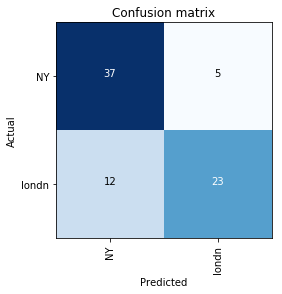

In [29]:
interp.plot_confusion_matrix()

In [30]:
from fastai.widgets import *

losses,idxs = interp.top_losses()
top_loss_paths = data.valid_ds.x[idxs]

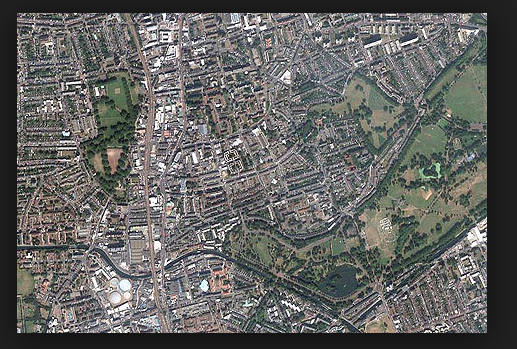

In [32]:
img = open_image(path/'stlt.png')
img

In [33]:
classes = ['londn','NY']
data2 = ImageDataBunch.single_from_classes(path, classes, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)
learn = create_cnn(data, models.resnet50, metrics=error_rate)
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (310 items)
[Category NY, Category NY, Category NY, Category NY, Category NY]...
Path: stlt
x: ImageItemList (310 items)
[Image (3, 237, 500), Image (3, 355, 500), Image (3, 312, 500), Image (3, 500, 412), Image (3, 332, 500)]...
Path: stlt;

Valid: LabelList
y: CategoryList (77 items)
[Category londn, Category NY, Category NY, Category londn, Category londn]...
Path: stlt
x: ImageItemList (77 items)
[Image (3, 235, 500), Image (3, 281, 500), Image (3, 354, 500), Image (3, 333, 500), Image (3, 500, 400)]...
Path: stlt;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kern

In [34]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category londn